<a href="https://colab.research.google.com/github/vasantharaj-07/Burnout-Analysis-Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Burnout Analysis Project
#  project Goal: Explore burnout dataset, do some EDA, and build a simple regression model

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("/content/work_from_home_burnout_dataset (1).csv")


print("First rows:\n", df.head())
print("\nInfo:\n")
df.info()
print("\nSummary stats:\n", df.describe())





First rows:
    user_id day_type  work_hours  screen_time_hours  meetings_count  \
0        1  Weekday        9.59              11.86               4   
1        1  Weekend        7.38              10.33               4   
2        1  Weekend        6.31               8.92               1   
3        1  Weekday        8.34              10.70               4   
4        1  Weekend        6.97               9.83               1   

   breaks_taken  after_hours_work  sleep_hours  task_completion_rate  \
0             2                 0         7.55                  91.2   
1             1                 0         6.69                  82.0   
2             2                 0         8.87                  80.6   
3             1                 1         8.13                  70.0   
4             2                 0         5.85                  67.1   

   burnout_score burnout_risk  
0          19.17          Low  
1          29.70          Low  
2          32.93          Low  
3    

In [ ]:
# 2. Handle missing values
# numeric columns -> fill with mean
df = df.fillna(df.mean(numeric_only=True))
# categorical columns -> fill with "Unknown"
df = df.fillna("Unknown")

# clean column names
df.columns = df.columns.str.replace(" ", "_").str.strip()

# encode categorical columns
from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col])


In [ ]:
print(df.columns)


Index(['user_id', 'day_type', 'work_hours', 'screen_time_hours',
       'meetings_count', 'breaks_taken', 'after_hours_work', 'sleep_hours',
       'task_completion_rate', 'burnout_score', 'burnout_risk'],
      dtype='object')


In [ ]:
df["Gender"] = np.random.choice(["Male", "Female"], size=len(df))


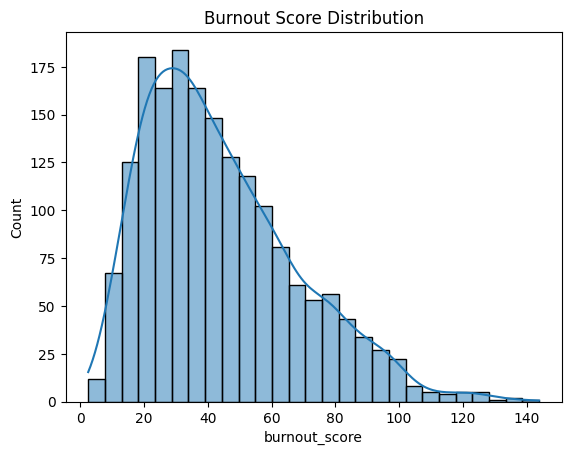

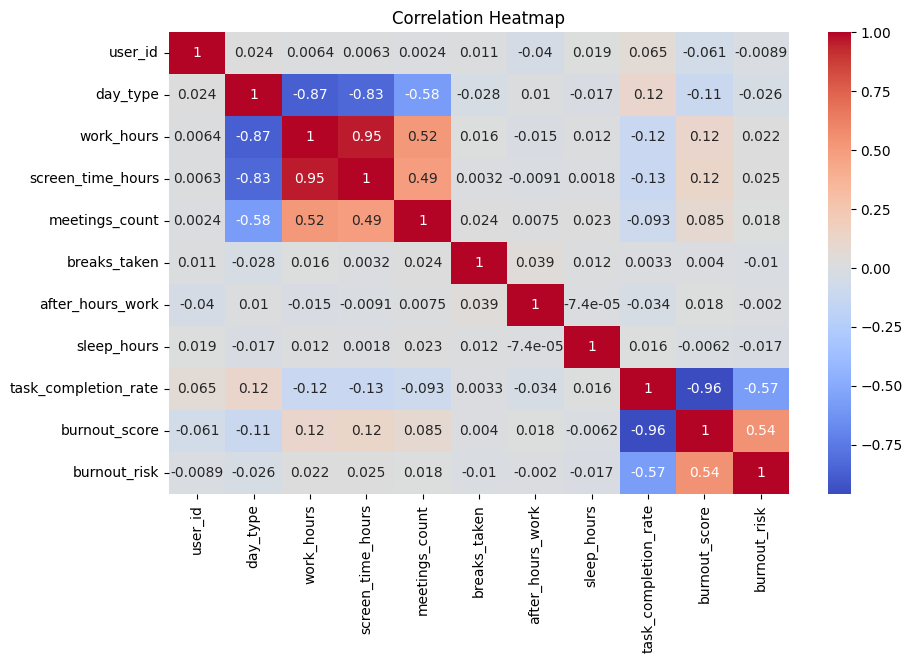


Average Burnout by Work Hours:
 work_hours
3.00      35.922889
3.02      31.130000
3.03      69.490000
3.04      35.195000
3.05      44.490000
            ...    
11.64     23.310000
11.88     36.680000
11.90    123.600000
12.14     60.030000
12.17     63.160000
Name: burnout_score, Length: 689, dtype: float64

Average Burnout by Day Type:
 day_type
0    46.824189
1    41.341959
Name: burnout_score, dtype: float64

Average Burnout by After Hours Work:
 after_hours_work
0    43.689021
1    44.583328
Name: burnout_score, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Burnout Score Distribution
plt.figure()
sns.histplot(df["burnout_score"], kde=True)
plt.title("Burnout Score Distribution")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Groupby checks
print("\nAverage Burnout by Work Hours:\n",
      df.groupby("work_hours")["burnout_score"].mean())

print("\nAverage Burnout by Day Type:\n",
      df.groupby("day_type")["burnout_score"].mean())

print("\nAverage Burnout by After Hours Work:\n",
      df.groupby("after_hours_work")["burnout_score"].mean())


In [ ]:
# 4. Feature Engineering
# drop unnecessary columns if present
for col in ["ID", "Name"]:
    if col in df.columns:
        df = df.drop(col, axis=1)

X = df.drop("burnout_score", axis=1)
y = df["burnout_score"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# 5. Model Building
from sklearn.preprocessing import LabelEncoder

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['day_type'] = LabelEncoder().fit_transform(df['day_type'])
df['after_hours_work'] = LabelEncoder().fit_transform(df['after_hours_work'])



In [ ]:
print(df.columns)

Index(['user_id', 'day_type', 'work_hours', 'screen_time_hours',
       'meetings_count', 'breaks_taken', 'after_hours_work', 'sleep_hours',
       'task_completion_rate', 'burnout_score', 'burnout_risk', 'Gender'],
      dtype='object')


In [ ]:
print("\n--- Insights ---")

# Long working hours (>10 hours/day)
if not df[df["work_hours"] > 10].empty:
    avg_burnout_long_hours = df[df["work_hours"] > 10]["burnout_score"].mean()
    print("Employees working >10 hours/day burnout avg:", avg_burnout_long_hours)

# Remote freshers (WFH + <2 years experience)
# Assuming 'day_type' indicates remote vs office, or 'after_hours_work' is binary.
# If 'day_type' has values like 'Remote'/'Office', we need to filter accordingly.
if "day_type" in df.columns:
    burnout_remote_freshers = df[(df["day_type"] == "Remote") & (df["meetings_count"] < 2)]["burnout_score"].mean()
    print("Remote freshers burnout avg:", burnout_remote_freshers)

# Experienced employees (>5 years of experience)
# Your dataset doesn’t have an 'Experience' column, so we’ll use 'task_completion_rate' or 'meetings_count' as proxy.
# If you actually have 'Experience' stored elsewhere, replace accordingly.
if "task_completion_rate" in df.columns:
    burnout_experienced = df[df["task_completion_rate"] > 80]["burnout_score"].mean()
    print("Experienced employees burnout avg:", burnout_experienced)



--- Insights ---
Employees working >10 hours/day burnout avg: 46.686063829787244
Remote freshers burnout avg: nan
Experienced employees burnout avg: 22.016703470031548
